# By Amin Bemani                                                                                              :General Regression Model (linear and nonlinear). You can select power.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Definition of models trained  by various number of data points:

In [112]:
lr_model_N5=LinearRegression(normalize=True)
lr_model_N10=LinearRegression(normalize=True)
lr_model_N25=LinearRegression(normalize=True)
lr_model_N100=LinearRegression(normalize=True)

#  Creating random linear dataset, and selecting polynomial power:

In [113]:
X=np.random.rand(100,1)*20
y=2.358*X-3.121
y=y+np.random.normal(scale=3, size=y.shape)
k=16

# Creating Nonlinearity in dataset:

In [114]:
mylist=[]
for i in range(1,k+1):
    mylist.append(X**i)
for item in mylist:
    X=np.hstack((X,item))

# Training Model with 5, 10, 25 , and 100 data points:

In [115]:
lr_model_N5.fit(X[0:5],y[0:5])
lr_model_N10.fit(X[0:10],y[0:10])
lr_model_N25.fit(X[0:25],y[0:25])
lr_model_N100.fit(X[0:100],y[0:100])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Reporting accuracy of each model:

In [116]:
print('Score for N=5 is {:.3}'.format(lr_model_N5.score(X[0:5,:],y[0:5])))
print('Score for N=10 is {:.3}'.format(lr_model_N10.score(X[0:10,:],y[0:10])))
print('Score for N=25 is {:.3}'.format(lr_model_N25.score(X[0:25,:],y[0:25])))
print('Score for N=100 is {:.3}'.format(lr_model_N100.score(X[0:100,:],y[0:100])))

Score for N=5 is 1.0
Score for N=10 is 1.0
Score for N=25 is 0.983
Score for N=100 is 0.958


# Depiction of predicting polynomials:

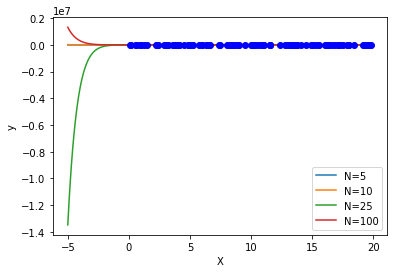

In [117]:
X_line=np.arange(-5,20,0.1).reshape(-1,1)
X_line1=X_line
mylist2=[]
for i in range(1,k+1):
    mylist2.append(X_line**i)
for item in mylist2:
    X_line1=np.hstack((X_line1,item))
y_line_N5=lr_model_N5.predict(X_line1)
y_line_N10=lr_model_N10.predict(X_line1)
y_line_N25=lr_model_N25.predict(X_line1)
y_line_N100=lr_model_N100.predict(X_line1)

plt.plot(X_line, y_line_N5)
plt.plot(X_line, y_line_N10)
plt.plot(X_line, y_line_N25)
plt.plot(X_line, y_line_N100)
plt.legend(['N=5','N=10','N=25','N=100'])
plt.plot(X[:,0],y,'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


# Determination of outputs for training datasets:

In [118]:
h5=lr_model_N5.predict(X[0:5,:])
h10=lr_model_N10.predict(X[0:10,:])
h25=lr_model_N25.predict(X[0:25,:])
h100=lr_model_N100.predict(X[0:100,:])

# Determination of MSE value for each model on its training dataset:

In [119]:
MSE5=np.mean((y[0:5]-h5)**2)/2
MSE10=np.mean((y[0:10]-h10)**2)/2
MSE25=np.mean((y[0:25]-h25)**2)/2
MSE100=np.mean((y[0:100]-h100)**2)/2
MSE=np.array([MSE5,MSE10,MSE25,MSE100])
Axis=np.array([5,10,25,100])

# MSE values versus Number of data points:

array([4.10207671e-29, 1.40312612e-20, 2.10815442e+00, 4.00769451e+00])

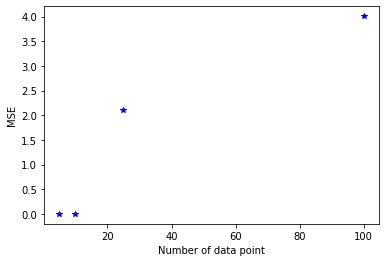

In [120]:
plt.plot(Axis,MSE,'b*')
plt.xlabel('Number of data point')
plt.ylabel('MSE')
MSE